In [3]:
# Install pandas en BigQuery in environment
!pip install pandas-gbq
!pip install google-cloud-bigquery

In [15]:
# Install all necessary libraries and packages
from google.cloud import bigquery

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set up BigQuery client
client= bigquery.Client()

# Define project ID, dataset and table
project_id= 'imposing-league-414320'
dataset_id= 'weather_forecast_data'
table_id= 'transformed_weather_data'

# Construct the full weather ID
table_full_id= f'{project_id}.{dataset_id}.{table_id}'

In [6]:
# Load data into a DataFrame
query= f'SELECT * FROM `{table_full_id}`'
df= client.query(query).to_dataframe()

In [7]:
# View the data
df.head(10)

,date,station_id,tmax,tmin,prcp,latitude,longitude
0,2022-07-01,USC00101024,17.014627,5.520464,0.0,43.5686,-116.2100
1,2022-07-04,USC00140548,17.014627,5.520464,0.0,37.0486,-95.2142
2,2022-11-24,USC00141730,17.014627,5.520464,0.0,38.8972,-100.1136
3,2022-03-02,USC00147248,17.014627,5.520464,0.0,39.7989,-97.7736
4,2022-09-27,USC00156635,17.014627,5.520464,0.0,38.9633,-84.8261
5,2023-07-31,USC00164592,17.014627,5.520464,0.0,32.3483,-93.2014
6,2023-12-14,USC00166808,17.014627,5.520464,0.0,30.9678,-91.1003
7,2023-09-04,USC00176484,17.014627,5.520464,0.0,44.0978,-70.5975
8,2023-02-17,USC00216166,17.014627,5.520464,0.0,46.0678,-93.6667
9,2023-01-12,USC00222773,17.014627,5.520464,0.0,34.1606,-89.9019


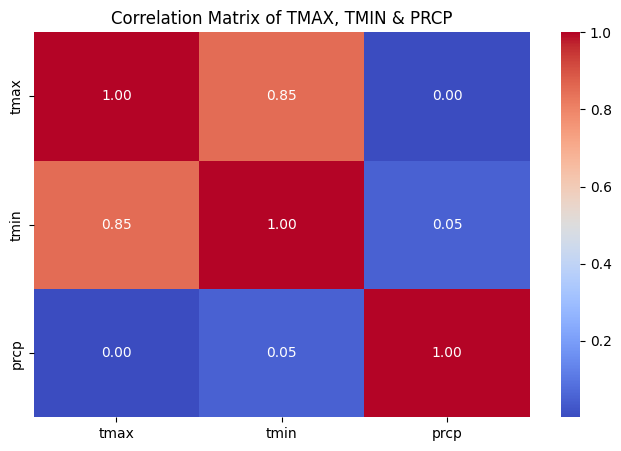

In [11]:
# Select relevant columns for correlation matrix
data= df[['tmax', 'tmin', 'prcp']]

# Correlation Matrix
correlation_matrix= data.corr()

# Plot Correlation Matrix
plt.figure(figsize= (8,5))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Correlation Matrix of TMAX, TMIN & PRCP')
plt.show()

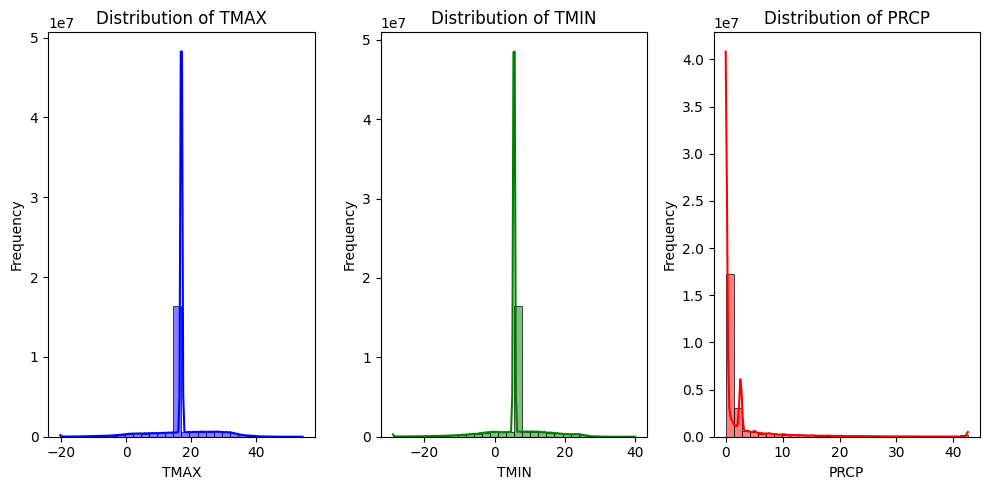

In [14]:
# Define the data
data= df[['tmax', 'tmin', 'prcp']]

# Plot histograms for each variable
plt.figure(figsize= (10,5))

# TMAX Distribution
plt.subplot(1,3,1)
sns.histplot(data['tmax'], kde= True, bins= 30, color= 'blue')
plt.xlabel('TMAX')
plt.ylabel('Frequency')
plt.title('Distribution of TMAX')

# TMIN Distribution
plt.subplot(1,3,2)
sns.histplot(data['tmin'], kde= True, bins= 30, color= 'green')
plt.xlabel('TMIN')
plt.ylabel('Frequency')
plt.title('Distribution of TMIN')

# PRCP Distribution
plt.subplot(1,3,3)
sns.histplot(data['prcp'], kde= True, bins= 30, color= 'red')
plt.xlabel('PRCP')
plt.ylabel('Frequency')
plt.title('Distribution of PRCP')

plt.tight_layout()
plt.show()

In [18]:
# Feature Engineering
df['date']= pd.to_datetime(df['date']) # Convert 'date' column to datetime

# Extract date features
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day
df['day_of_the_week']= df['date'].dt.dayofweek

In [19]:
# View dataset
df.head(10)

,date,station_id,tmax,tmin,prcp,latitude,longitude,year,month,day,day_of_the_week
0,2022-07-01,USC00101024,17.014627,5.520464,0.0,43.5686,-116.2100,2022,7,1,4
1,2022-07-04,USC00140548,17.014627,5.520464,0.0,37.0486,-95.2142,2022,7,4,0
2,2022-11-24,USC00141730,17.014627,5.520464,0.0,38.8972,-100.1136,2022,11,24,3
3,2022-03-02,USC00147248,17.014627,5.520464,0.0,39.7989,-97.7736,2022,3,2,2
4,2022-09-27,USC00156635,17.014627,5.520464,0.0,38.9633,-84.8261,2022,9,27,1
5,2023-07-31,USC00164592,17.014627,5.520464,0.0,32.3483,-93.2014,2023,7,31,0
6,2023-12-14,USC00166808,17.014627,5.520464,0.0,30.9678,-91.1003,2023,12,14,3
7,2023-09-04,USC00176484,17.014627,5.520464,0.0,44.0978,-70.5975,2023,9,4,0
8,2023-02-17,USC00216166,17.014627,5.520464,0.0,46.0678,-93.6667,2023,2,17,4
9,2023-01-12,USC00222773,17.014627,5.520464,0.0,34.1606,-89.9019,2023,1,12,3


In [20]:
# Create rolling features
df['tmax_rolling_mean_7'] = df['tmax'].rolling(window=7).mean()
df['tmin_rolling_mean_7'] = df['tmin'].rolling(window=7).mean()
df['prcp_rolling_mean_7'] = df['prcp'].rolling(window=7).mean()

df['tmax_rolling_mean_30'] = df['tmax'].rolling(window=30).mean()
df['tmin_rolling_mean_30'] = df['tmin'].rolling(window=30).mean()
df['prcp_rolling_mean_30'] = df['prcp'].rolling(window=30).mean()

# Create lag features
df['tmax_lag_1'] = df['tmax'].shift(1)
df['tmin_lag_1'] = df['tmin'].shift(1)
df['prcp_lag_1'] = df['prcp'].shift(1)

df['tmax_lag_7'] = df['tmax'].shift(7)
df['tmin_lag_7'] = df['tmin'].shift(7)
df['prcp_lag_7'] = df['prcp'].shift(7)

In [21]:
# View dataset
df.head(10)

,date,station_id,tmax,tmin,prcp,latitude,longitude,year,month,day,...,prcp_rolling_mean_7,tmax_rolling_mean_30,tmin_rolling_mean_30,prcp_rolling_mean_30,tmax_lag_1,tmin_lag_1,prcp_lag_1,tmax_lag_7,tmin_lag_7,prcp_lag_7
0,2022-07-01,USC00101024,17.014627,5.520464,0.0,43.5686,-116.2100,2022,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-04,USC00140548,17.014627,5.520464,0.0,37.0486,-95.2142,2022,7,4,...,NaN,NaN,NaN,NaN,17.014627,5.520464,0.0,NaN,NaN,NaN
2,2022-11-24,USC00141730,17.014627,5.520464,0.0,38.8972,-100.1136,2022,11,24,...,NaN,NaN,NaN,NaN,17.014627,5.520464,0.0,NaN,NaN,NaN
3,2022-03-02,USC00147248,17.014627,5.520464,0.0,39.7989,-97.7736,2022,3,2,...,NaN,NaN,NaN,NaN,17.014627,5.520464,0.0,NaN,NaN,NaN
4,2022-09-27,USC00156635,17.014627,5.520464,0.0,38.9633,-84.8261,2022,9,27,...,NaN,NaN,NaN,NaN,17.014627,5.520464,0.0,NaN,NaN,NaN
5,2023-07-31,USC00164592,17.014627,5.520464,0.0,32.3483,-93.2014,2023,7,31,...,NaN,NaN,NaN,NaN,17.014627,5.520464,0.0,NaN,NaN,NaN
6,2023-12-14,USC00166808,17.014627,5.520464,0.0,30.9678,-91.1003,2023,12,14,...,0.0,NaN,NaN,NaN,17.014627,5.520464,0.0,NaN,NaN,NaN
7,2023-09-04,USC00176484,17.014627,5.520464,0.0,44.0978,-70.5975,2023,9,4,...,0.0,NaN,NaN,NaN,17.014627,5.520464,0.0,17.014627,5.520464,0.0
8,2023-02-17,USC00216166,17.014627,5.520464,0.0,46.0678,-93.6667,2023,2,17,...,0.0,NaN,NaN,NaN,17.014627,5.520464,0.0,17.014627,5.520464,0.0
9,2023-01-12,USC00222773,17.014627,5.520464,0.0,34.1606,-89.9019,2023,1,12,...,0.0,NaN,NaN,NaN,17.014627,5.520464,0.0,17.014627,5.520464,0.0


In [22]:
# Fill any NaN values that resulted from rolling and lag features
df = df.fillna(method='bfill').fillna(method='ffill')